## Daniel Blessing

### Analytic Goal

Monitor the average return per hour of Bitcoin over the last month and look for statistically significant trends

In [59]:
import matplotlib.pyplot as plt
from datetime import datetime
import re

data = '[(datetime.datetime(2021, 1, 1, 0, 0), 28965.0), (datetime.datetime(2021, 1, 1, 1, 0), 29007.0), (datetime.datetime(2021, 1, 1, 2, 0), 29467.0), (datetime.datetime(2021, 1, 1, 3, 0), 29226.0), (datetime.datetime(2021, 1, 1, 4, 0), 29337.0), (datetime.datetime(2021, 1, 1, 5, 0), 29236.0), (datetime.datetime(2021, 1, 1, 6, 0), 29212.0), (datetime.datetime(2021, 1, 1, 7, 0), 29178.46137096), (datetime.datetime(2021, 1, 1, 8, 0), 29143.0), (datetime.datetime(2021, 1, 1, 9, 0), 29007.0), (datetime.datetime(2021, 1, 1, 10, 0), 29186.7747622), (datetime.datetime(2021, 1, 1, 11, 0), 29232.05762442), (datetime.datetime(2021, 1, 1, 12, 0), 29330.658), (datetime.datetime(2021, 1, 1, 13, 0), 29289.0), (datetime.datetime(2021, 1, 1, 14, 0), 29499.0), (datetime.datetime(2021, 1, 1, 15, 0), 29352.0), (datetime.datetime(2021, 1, 1, 16, 0), 29240.267), (datetime.datetime(2021, 1, 1, 17, 0), 29302.0), (datetime.datetime(2021, 1, 1, 18, 0), 29048.0), (datetime.datetime(2021, 1, 1, 19, 0), 29064.0), (datetime.datetime(2021, 1, 1, 20, 0), 28950.0), (datetime.datetime(2021, 1, 1, 21, 0), 29260.0), (datetime.datetime(2021, 1, 1, 22, 0), 29203.0), (datetime.datetime(2021, 1, 1, 23, 0), 29299.0), (datetime.datetime(2021, 1, 2, 0, 0), 29333.0), (datetime.datetime(2021, 1, 2, 1, 0), 29197.0), (datetime.datetime(2021, 1, 2, 2, 0), 29342.0), (datetime.datetime(2021, 1, 2, 3, 0), 29352.0), (datetime.datetime(2021, 1, 2, 4, 0), 29362.0), (datetime.datetime(2021, 1, 2, 5, 0), 29366.0), (datetime.datetime(2021, 1, 2, 6, 0), 29555.0), (datetime.datetime(2021, 1, 2, 7, 0), 29717.0), (datetime.datetime(2021, 1, 2, 8, 0), 29833.0), (datetime.datetime(2021, 1, 2, 9, 0), 29845.0), (datetime.datetime(2021, 1, 2, 10, 0), 29678.0), (datetime.datetime(2021, 1, 2, 11, 0), 29703.2155), (datetime.datetime(2021, 1, 2, 12, 0), 29793.0), (datetime.datetime(2021, 1, 2, 13, 0), 30650.0), (datetime.datetime(2021, 1, 2, 14, 0), 31443.0), (datetime.datetime(2021, 1, 2, 15, 0), 31295.0), (datetime.datetime(2021, 1, 2, 16, 0), 31805.0), (datetime.datetime(2021, 1, 2, 17, 0), 32589.0), (datetime.datetime(2021, 1, 2, 18, 0), 32833.0), (datetime.datetime(2021, 1, 2, 19, 0), 32800.0), (datetime.datetime(2021, 1, 2, 20, 0), 32943.0), (datetime.datetime(2021, 1, 2, 21, 0), 30693.0), (datetime.datetime(2021, 1, 2, 22, 0), 31685.0), (datetime.datetime(2021, 1, 2, 23, 0), 32170.0), (datetime.datetime(2021, 1, 3, 0, 0), 32221.0), (datetime.datetime(2021, 1, 3, 1, 0), 32353.06987326), (datetime.datetime(2021, 1, 3, 2, 0), 32633.0), (datetime.datetime(2021, 1, 3, 3, 0), 32757.0), (datetime.datetime(2021, 1, 3, 4, 0), 32622.0), (datetime.datetime(2021, 1, 3, 5, 0), 33261.0), (datetime.datetime(2021, 1, 3, 6, 0), 33690.0), (datetime.datetime(2021, 1, 3, 7, 0), 33858.0), (datetime.datetime(2021, 1, 3, 8, 0), 34533.0), (datetime.datetime(2021, 1, 3, 9, 0), 34394.0), (datetime.datetime(2021, 1, 3, 10, 0), 34256.0), (datetime.datetime(2021, 1, 3, 11, 0), 33836.0), (datetime.datetime(2021, 1, 3, 12, 0), 34510.0), (datetime.datetime(2021, 1, 3, 13, 0), 34229.0), (datetime.datetime(2021, 1, 3, 14, 0), 33762.0), (datetime.datetime(2021, 1, 3, 15, 0), 33908.0), (datetime.datetime(2021, 1, 3, 16, 0), 33734.0), (datetime.datetime(2021, 1, 3, 17, 0), 32584.14369663), (datetime.datetime(2021, 1, 3, 18, 0), 33002.0), (datetime.datetime(2021, 1, 3, 19, 0), 32685.0), (datetime.datetime(2021, 1, 3, 20, 0), 32747.0), (datetime.datetime(2021, 1, 3, 21, 0), 33730.0), (datetime.datetime(2021, 1, 3, 22, 0), 33424.0), (datetime.datetime(2021, 1, 3, 23, 0), 33177.0), (datetime.datetime(2021, 1, 4, 0, 0), 33022.0), (datetime.datetime(2021, 1, 4, 1, 0), 32895.3735), (datetime.datetime(2021, 1, 4, 2, 0), 33136.0), (datetime.datetime(2021, 1, 4, 3, 0), 33450.0), (datetime.datetime(2021, 1, 4, 4, 0), 33491.4197696), (datetime.datetime(2021, 1, 4, 5, 0), 33270.0), (datetime.datetime(2021, 1, 4, 6, 0), 32895.0), (datetime.datetime(2021, 1, 4, 7, 0), 33224.0), (datetime.datetime(2021, 1, 4, 8, 0), 32312.0), (datetime.datetime(2021, 1, 4, 9, 0), 32042.0), (datetime.datetime(2021, 1, 4, 10, 0), 31226.79420025), (datetime.datetime(2021, 1, 4, 11, 0), 30181.0), (datetime.datetime(2021, 1, 4, 12, 0), 30718.0), (datetime.datetime(2021, 1, 4, 13, 0), 31099.0), (datetime.datetime(2021, 1, 4, 14, 0), 31632.0), (datetime.datetime(2021, 1, 4, 15, 0), 32148.0), (datetime.datetime(2021, 1, 4, 16, 0), 31865.0), (datetime.datetime(2021, 1, 4, 17, 0), 31445.0), (datetime.datetime(2021, 1, 4, 18, 0), 31166.0), (datetime.datetime(2021, 1, 4, 19, 0), 31246.0), (datetime.datetime(2021, 1, 4, 20, 0), 31784.0), (datetime.datetime(2021, 1, 4, 21, 0), 31283.0), (datetime.datetime(2021, 1, 4, 22, 0), 30940.0), (datetime.datetime(2021, 1, 4, 23, 0), 31351.0), (datetime.datetime(2021, 1, 5, 0, 0), 32085.491796), (datetime.datetime(2021, 1, 5, 1, 0), 32512.82234562), (datetime.datetime(2021, 1, 5, 2, 0), 32796.2104448), (datetime.datetime(2021, 1, 5, 3, 0), 32372.0), (datetime.datetime(2021, 1, 5, 4, 0), 31386.0), (datetime.datetime(2021, 1, 5, 5, 0), 30850.0), (datetime.datetime(2021, 1, 5, 6, 0), 30412.0), (datetime.datetime(2021, 1, 5, 7, 0), 31210.0), (datetime.datetime(2021, 1, 5, 8, 0), 30873.0), (datetime.datetime(2021, 1, 5, 9, 0), 31288.69352412), (datetime.datetime(2021, 1, 5, 10, 0), 31681.0), (datetime.datetime(2021, 1, 5, 11, 0), 31373.53622375), (datetime.datetime(2021, 1, 5, 12, 0), 31904.0), (datetime.datetime(2021, 1, 5, 13, 0), 31677.0), (datetime.datetime(2021, 1, 5, 14, 0), 31471.0), (datetime.datetime(2021, 1, 5, 15, 0), 32289.27188256), (datetime.datetime(2021, 1, 5, 16, 0), 32128.208792), (datetime.datetime(2021, 1, 5, 17, 0), 32519.0), (datetime.datetime(2021, 1, 5, 18, 0), 32856.0), (datetime.datetime(2021, 1, 5, 19, 0), 33524.0), (datetime.datetime(2021, 1, 5, 20, 0), 33715.0), (datetime.datetime(2021, 1, 5, 21, 0), 33999.0), (datetime.datetime(2021, 1, 5, 22, 0), 33863.0), (datetime.datetime(2021, 1, 5, 23, 0), 34319.0), (datetime.datetime(2021, 1, 6, 0, 0), 34079.0), (datetime.datetime(2021, 1, 6, 1, 0), 33954.0), (datetime.datetime(2021, 1, 6, 2, 0), 33855.0), (datetime.datetime(2021, 1, 6, 3, 0), 33970.0), (datetime.datetime(2021, 1, 6, 4, 0), 34233.0), (datetime.datetime(2021, 1, 6, 5, 0), 35520.0), (datetime.datetime(2021, 1, 6, 6, 0), 34927.0), (datetime.datetime(2021, 1, 6, 7, 0), 34954.0), (datetime.datetime(2021, 1, 6, 8, 0), 34726.390526), (datetime.datetime(2021, 1, 6, 9, 0), 34532.0), (datetime.datetime(2021, 1, 6, 10, 0), 33926.0), (datetime.datetime(2021, 1, 6, 11, 0), 34438.0), (datetime.datetime(2021, 1, 6, 12, 0), 35025.0), (datetime.datetime(2021, 1, 6, 13, 0), 35061.0), (datetime.datetime(2021, 1, 6, 14, 0), 34509.45766971), (datetime.datetime(2021, 1, 6, 15, 0), 34359.0), (datetime.datetime(2021, 1, 6, 16, 0), 34762.0), (datetime.datetime(2021, 1, 6, 17, 0), 34622.0), (datetime.datetime(2021, 1, 6, 18, 0), 35105.0), (datetime.datetime(2021, 1, 6, 19, 0), 35235.32628), (datetime.datetime(2021, 1, 6, 20, 0), 35041.536942), (datetime.datetime(2021, 1, 6, 21, 0), 36135.0), (datetime.datetime(2021, 1, 6, 22, 0), 35761.0), (datetime.datetime(2021, 1, 6, 23, 0), 35994.0), (datetime.datetime(2021, 1, 7, 0, 0), 36889.0), (datetime.datetime(2021, 1, 7, 1, 0), 37087.79333165), (datetime.datetime(2021, 1, 7, 2, 0), 36889.0), (datetime.datetime(2021, 1, 7, 3, 0), 37039.0), (datetime.datetime(2021, 1, 7, 4, 0), 37388.0), (datetime.datetime(2021, 1, 7, 5, 0), 37529.63215416), (datetime.datetime(2021, 1, 7, 6, 0), 37418.0), (datetime.datetime(2021, 1, 7, 7, 0), 37165.0), (datetime.datetime(2021, 1, 7, 8, 0), 36919.0), (datetime.datetime(2021, 1, 7, 9, 0), 37165.0), (datetime.datetime(2021, 1, 7, 10, 0), 37356.0), (datetime.datetime(2021, 1, 7, 11, 0), 37079.984906), (datetime.datetime(2021, 1, 7, 12, 0), 37785.0), (datetime.datetime(2021, 1, 7, 13, 0), 38001.0), (datetime.datetime(2021, 1, 7, 14, 0), 38117.291088), (datetime.datetime(2021, 1, 7, 15, 0), 38421.79141202), (datetime.datetime(2021, 1, 7, 16, 0), 39144.0), (datetime.datetime(2021, 1, 7, 17, 0), 39243.0), (datetime.datetime(2021, 1, 7, 18, 0), 39765.0), (datetime.datetime(2021, 1, 7, 19, 0), 38824.0), (datetime.datetime(2021, 1, 7, 20, 0), 38995.0), (datetime.datetime(2021, 1, 7, 21, 0), 39089.0), (datetime.datetime(2021, 1, 7, 22, 0), 39586.0), (datetime.datetime(2021, 1, 7, 23, 0), 39504.0), (datetime.datetime(2021, 1, 8, 0, 0), 39437.0), (datetime.datetime(2021, 1, 8, 1, 0), 38797.0), (datetime.datetime(2021, 1, 8, 2, 0), 38549.65963035), (datetime.datetime(2021, 1, 8, 3, 0), 37359.0), (datetime.datetime(2021, 1, 8, 4, 0), 38161.0), (datetime.datetime(2021, 1, 8, 5, 0), 38579.0), (datetime.datetime(2021, 1, 8, 6, 0), 37899.0), (datetime.datetime(2021, 1, 8, 7, 0), 38380.0), (datetime.datetime(2021, 1, 8, 8, 0), 38909.0), (datetime.datetime(2021, 1, 8, 9, 0), 38723.0), (datetime.datetime(2021, 1, 8, 10, 0), 39297.0), (datetime.datetime(2021, 1, 8, 11, 0), 40524.0), (datetime.datetime(2021, 1, 8, 12, 0), 41232.0), (datetime.datetime(2021, 1, 8, 13, 0), 41261.0), (datetime.datetime(2021, 1, 8, 14, 0), 41446.741606), (datetime.datetime(2021, 1, 8, 15, 0), 41597.0), (datetime.datetime(2021, 1, 8, 16, 0), 41046.0), (datetime.datetime(2021, 1, 8, 17, 0), 41377.450664), (datetime.datetime(2021, 1, 8, 18, 0), 41118.0), (datetime.datetime(2021, 1, 8, 19, 0), 40170.0), (datetime.datetime(2021, 1, 8, 20, 0), 40228.24220028), (datetime.datetime(2021, 1, 8, 21, 0), 38822.0), (datetime.datetime(2021, 1, 8, 22, 0), 39970.0), (datetime.datetime(2021, 1, 8, 23, 0), 40569.0), (datetime.datetime(2021, 1, 9, 0, 0), 40551.0), (datetime.datetime(2021, 1, 9, 1, 0), 40189.27292625), (datetime.datetime(2021, 1, 9, 2, 0), 40172.0), (datetime.datetime(2021, 1, 9, 3, 0), 39858.38576148), (datetime.datetime(2021, 1, 9, 4, 0), 40128.0), (datetime.datetime(2021, 1, 9, 5, 0), 39969.0), (datetime.datetime(2021, 1, 9, 6, 0), 39101.0), (datetime.datetime(2021, 1, 9, 7, 0), 38748.0), (datetime.datetime(2021, 1, 9, 8, 0), 39573.0), (datetime.datetime(2021, 1, 9, 9, 0), 40176.23572768), (datetime.datetime(2021, 1, 9, 10, 0), 40376.0), (datetime.datetime(2021, 1, 9, 11, 0), 40360.0), (datetime.datetime(2021, 1, 9, 12, 0), 40585.77318413), (datetime.datetime(2021, 1, 9, 13, 0), 40950.0), (datetime.datetime(2021, 1, 9, 14, 0), 41123.67312693), (datetime.datetime(2021, 1, 9, 15, 0), 40926.85064786)]'

data_f = data[1:-1]


data_f = data_f.split('), (')

data_f_s = [i.split('), ') for i in data_f]


In [60]:
btc_data = []

for i in data_f_s:
    
    time = re.findall(r'[0-9]+', i[0])
    
    price = re.findall(r'[0-9]+', i[1])
    
    btc_data.append((time,price[0]))
    
    


In [61]:
for i,v in enumerate(btc_data):
    btc_data[i] = list(v)

In [62]:
btc_data[0].append(-0.01)

In [63]:
for i,v in enumerate(btc_data[1:]):
    
    change = ( (float(btc_data[i][1]) - float(btc_data[i-1][1])) /(float(btc_data[i-1][1])))
              
    btc_data[i+1].append(change)
        
    

In [64]:
hourly_return = {}
count = {}

for i in range(24):
    hourly_return[i] = 0 
    count[i] = 0 
for i in btc_data:
    hourly_return[ int(i[0][3])] += i[2]
    count[int(i[0][3])] += 1 

for i in range(24):
    hourly_return[i] = hourly_return[i] / count[i]


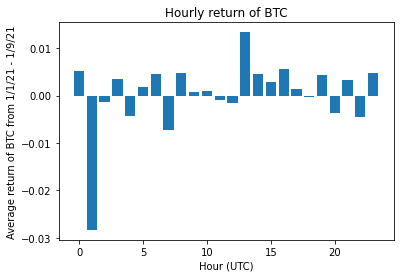

In [83]:
figure = plt.bar(hourly_return.keys(),hourly_return.values())

plt.title('Hourly return of BTC')

plt.xlabel('Hour (UTC)')

plt.ylabel('Average return of BTC from 1/1/21 - 1/9/21')

print()